## Descrição:

Este notebook corresponde ao exercício feito em sala no dia 29/05. nele, são elaborados scripts para visualização de gráficos de séries autorregressivas e de média móvel. as primeiras células de código contém simulações e as últimas são usados dados reais.

### importando pacotes

In [1]:
#install.packages("forecast")
#install.packages("readxl")
library("forecast")
library("readxl")


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## Modelos de média móvel:
#### forma geral da equação:
$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$

##### Simulação de série MA(0) 

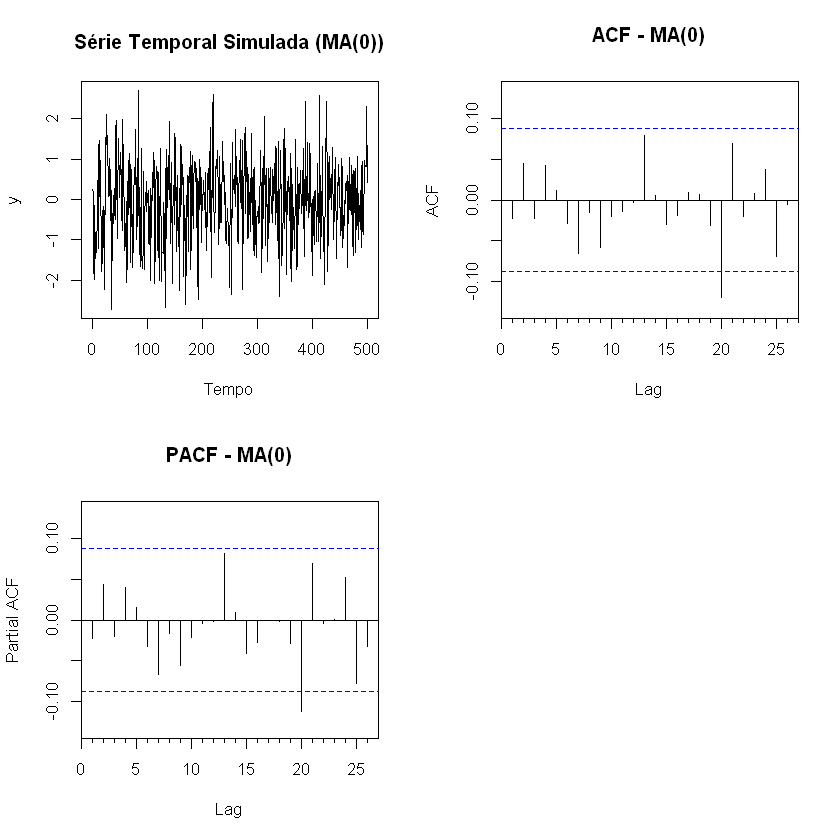

In [2]:
y <- arima.sim(list(ma = c(0, 0)), n = 500)

# Layout 2x2 para manter espaço
par(mfrow = c(2, 2))

# Plota a série temporal
plot(y, main = "Série Temporal Simulada (MA(0))", ylab = "y", xlab = "Tempo")

# ACF
Acf(y, main = "ACF - MA(0)")

# PACF
Pacf(y, main = "PACF - MA(0)")


##### simulação MA(1) com $\theta_1$ = 0.8

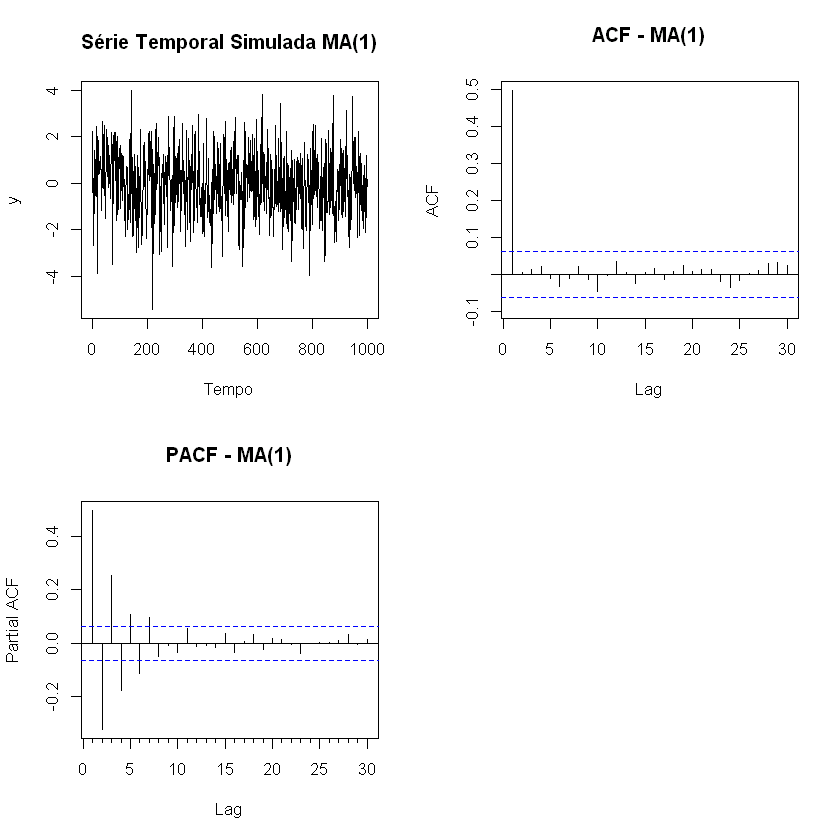

In [3]:
# Simula uma série MA(2)
y <- arima.sim(list(ma = c(0.8)), n = 1000)

# Layout 2x2 para exibir os 3 gráficos
par(mfrow = c(2, 2))

# Série temporal
plot(y, main = "Série Temporal Simulada MA(1)", 
     xlab = "Tempo", ylab = "y")

# ACF
Acf(y, main = "ACF - MA(1)")

# PACF
Pacf(y, main = "PACF - MA(1)")

# Espaço vazio no 4º painel
plot.new()


#### Simulação MA(2) com $\theta_1 = 0.6$ e $\theta_2 = 0.4$

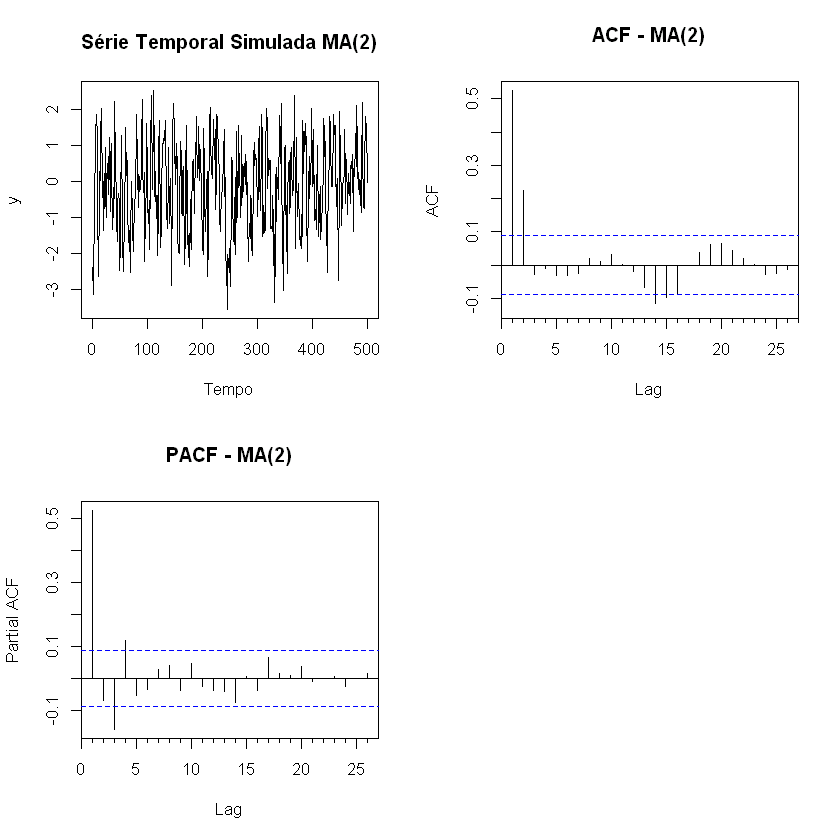

In [4]:
y <- arima.sim(list(ma = c(0.6, 0.4)), n = 500)

# Layout 2x2
par(mfrow = c(2, 2))

# Série temporal
plot(y, main = "Série Temporal Simulada MA(2)",
     xlab = "Tempo", ylab = "y")

# ACF
Acf(y, main = "ACF - MA(2)")

# PACF
Pacf(y, main = "PACF - MA(2)")

# Painel vazio
plot.new()


## Modelos autorregressivos
#### a forma geral da equação dos modelos é dada por:

$Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$

##### Simulação AR(1) com $\phi_1 = 0.9$

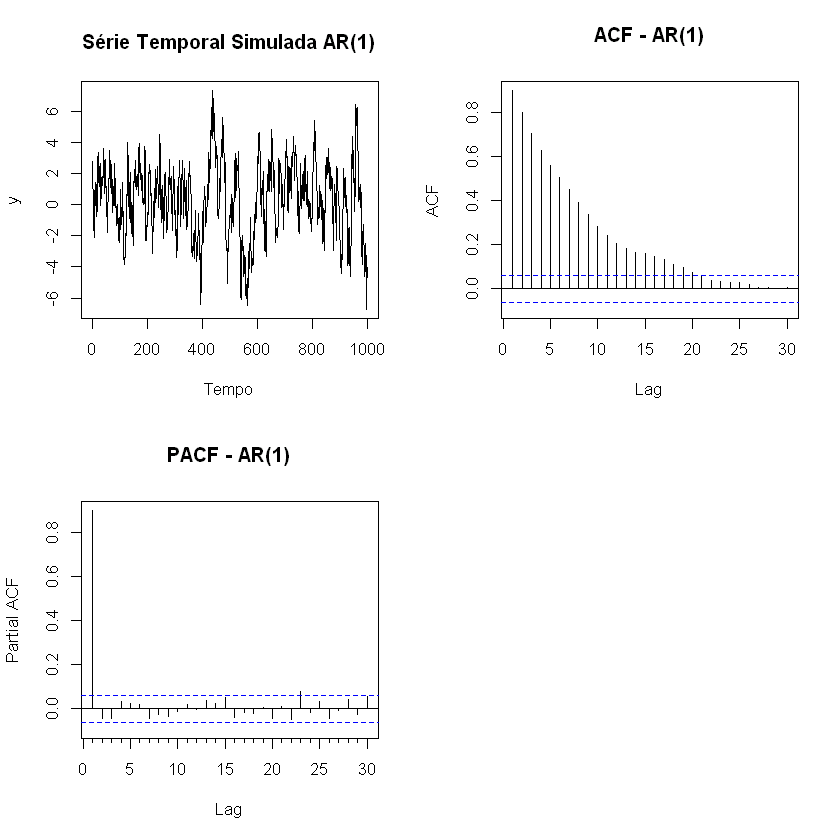

In [5]:
# Simula o processo AR(1)
y <- arima.sim(list(ar = c(0.9)), n = 1000)

# Configura o layout para 2 linhas e 2 colunas
par(mfrow = c(2, 2))

# 1. Plot da Série Temporal
plot(y, main = "Série Temporal Simulada AR(1)", # Título ajustado para AR(1)
     xlab = "Tempo", ylab = "y")

# 2. Plot da Função de Autocorrelação (ACF)
Acf(y, main = "ACF - AR(1)") # Título ajustado para AR(1)

# 3. Plot da Função de Autocorrelação Parcial (PACF)
Pacf(y, main = "PACF - AR(1)") # Título ajustado para AR(1)

# 4. Painel Vazio (para completar o grid 2x2, como no seu exemplo MA(2))
plot.new()

#### Simulação AR(2) com $\phi_1 = 0.45$ e $\phi_2 = 0.5$

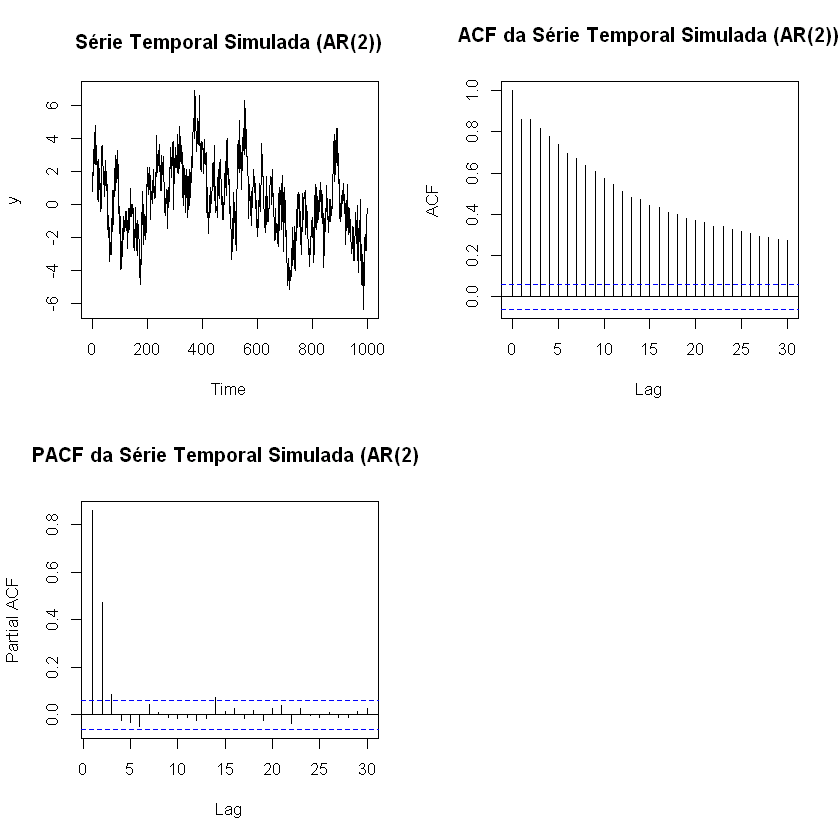

In [6]:
y = arima.sim(list(ar = c(0.45, 0.5)), n = 1000)

# Define layout dos gráficos: 2 linha, 2 colunas
par(mfrow = c(2,2))

# Plota os gráficos lado a lado
plot(y, main = "Série Temporal Simulada (AR(2))")
acf(y, main = "ACF da Série Temporal Simulada (AR(2))")
pacf(y, main = "PACF da Série Temporal Simulada (AR(2))")


## Estimando com dados reais:

o principal desafio desta etapa se dá em entender qual o processo gerador de dados

#### Exemplo 1: títulos do tesouro americano

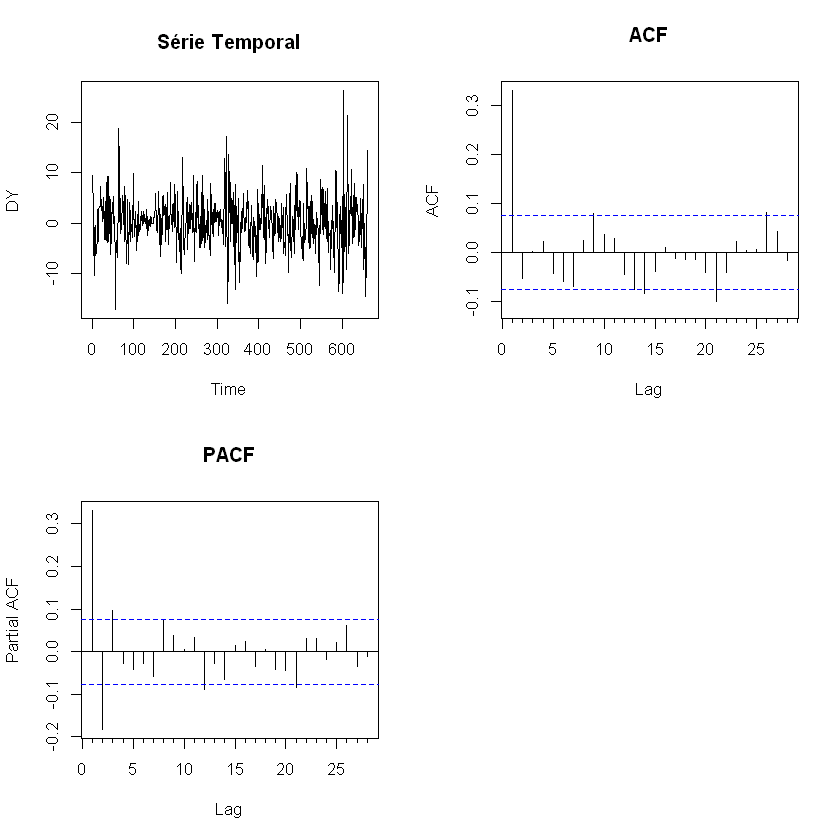

In [7]:
y = read_excel('data/Figure6_5_Table6_1_treasury.xls')

# selecionando apenas a coluna de interesse
y=y[,2]

#transformando a série em um objeto time serie
y=ts(y)


par(mfrow = c(2,2))

# Plota os gráficos lado a lado
plot(y, main = "Série Temporal")
Acf(y, main = "ACF")
Pacf(y, main = "PACF")

#### Exemplo 2: vendas de roupas ao longo do tempo

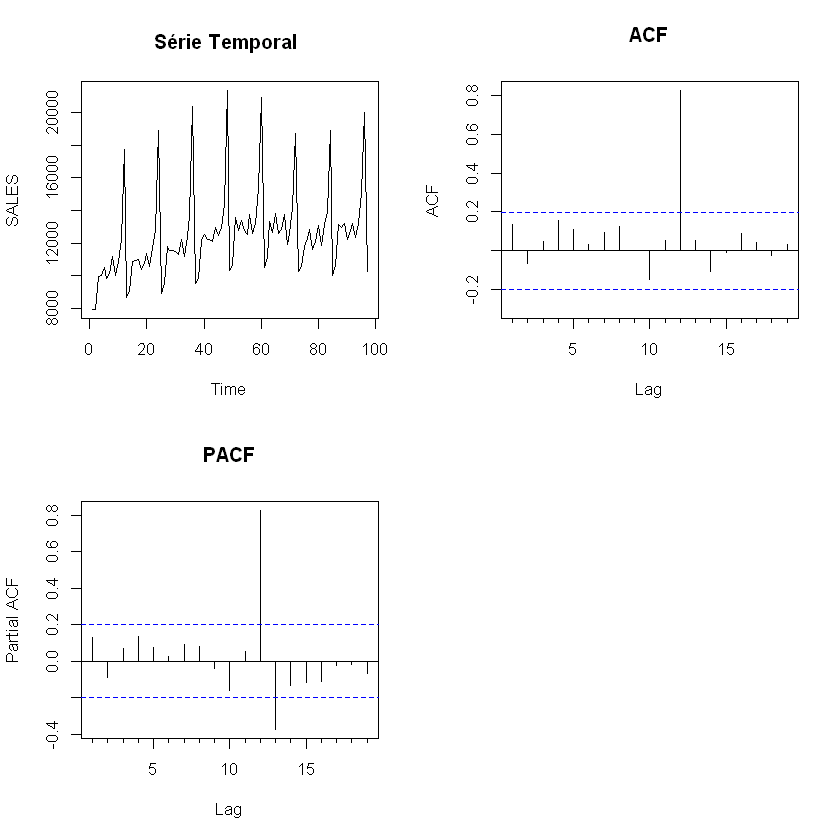

In [8]:
y = read_excel('data/Figure7_17_clothingsales.xls')

# selecionando apenas a coluna de interesse
y=y[,2]

#transformando a série em um objeto ts
y=ts(y)


par(mfrow = c(2,2))

# Plota os gráficos lado a lado
plot(y, main = "Série Temporal ")
Acf(y, main = "ACF")
Pacf(y, main = "PACF")